In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.1/300.1 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
import pandas as pd
import re
from collections import Counter
import os
import numpy as np

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# **Text Preporcesing and Cleaning**

In [ ]:
kisaltma = ["gr",  "kg",  "mg",  "lt",  "ml",  "cm",  "m",   "km",  "mm",  "adet","tane"]
baglaclar = ["ve","ile","de","ama","fakat","lakin","ancak","yalnız","oysa","oysaki","ki","çünkü","zira","madem","eğer","şayet","hem",  "ne",   "ya",   "ister","bi" ]

In [ ]:
def turkish_to_english(text):
    # Türkçe karakterlerin İngilizce karşılıkları
    turkish_chars = "çğıöşüÇĞİÖŞÜ"
    english_chars = "cgiosuCGIOSU"

    # Çeviri tablosu oluştur
    tr_to_en_translation = str.maketrans(turkish_chars, english_chars)

    # Metni çevir
    translated_text = text.translate(tr_to_en_translation)

    return translated_text

def getBirads(last_word):
	if last_word[1].strip().isdigit():
		return last_word[1].strip()
	else:
		word = list(last_word[1].strip())
		for harf in word:
			if harf.isdigit():
				return harf.strip()
			else:
				continue

		word = list(last_word[0].strip())
		for harf in word:
			if harf.isdigit():
				return harf.strip()
			else:
				continue

def biradsCol(data):
		df = data.copy()
		last_words = [row.strip().split(" ")[-2:] for row in df["text"]]
		df["birads"] = [getBirads(x) for x in last_words]
		return df

def process(data):
	df = data.copy()

  #turkish to english
	df["text"] = df["text"].apply(turkish_to_english)
	#noktalama
	df["text"] = df["text"].apply(lambda x:re.sub(r'[^\w\s]', " ", x))
	#bosluk
	df["text"] = df["text"].apply(lambda x:re.sub(r"\s{2,}", " ", x))
	df["text"] = df["text"].str.lower()
	#\n
	df["text"] = df["text"].apply(lambda x:re.sub(r"\n", " ", x))
	#hard space
	df['text'] = df['text'].str.replace('\xa0', ' ')

  #tek karakter
	df = tek_karakter_temizle_df(df, "text")

	return df

def remove_last_two_words(text):
    # Kelimeleri boşluklara göre ayır
    words = text.split()

    # Eğer kelime sayısı 2'den azsa, tüm metni kaldır
    if len(words) <= 2:
        return ""

    # Son iki kelimeyi kaldır
    words = words[:-2]

    # Kalan kelimeleri birleştirerek yeni stringi oluştur
    return " ".join(words)

def remove_last_two_df(data):
  df = data.copy()
  df["text"] = df["text"].apply(remove_last_two_words)
  return df


def words2(text):
    return re.findall(r'\w+', text.lower())

def most_common_words_from_df(df, column_name, n):
    # DataFrame'deki belirtilen sütundaki tüm metinleri birleştir
    text = ' '.join(df[column_name].astype(str).tolist())

    # Metni kelimelere böl
    word_list = words2(text)

    # Kelimelerin sayımını yap
    word_counts = Counter(word_list)

    # En sık geçen n kelimeyi al
    common_words = word_counts.most_common(n)

    # Sadece kelimeleri içeren bir liste döndür
    return [word for word, count in common_words]

def tek_karakter_temizle(text):
    # Temizlenecek karakterler
    allowed_chars = ["a", "b", "c", "d"]

    # Metni kelimelere böl
    words = text.split()

    # Filtreleme işlemi
    cleaned_words = [word for word in words if len(word) != 1 or word in allowed_chars]

    # Kelimeleri tekrar birleştir
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

def tek_karakter_temizle_df(df, column_name):
    # Her satırdaki metni temizle
    df[column_name] = df[column_name].apply(lambda x: tek_karakter_temizle(str(x)))
    return df

In [ ]:
def remove_stop_words_text(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.strip() not in stopwords]
    return ' '.join(filtered_words)

def remove_stop_words_df(df, column_name, stopwords):
    df[column_name] = df[column_name].apply(lambda text: remove_stop_words_text(text, stopwords))
    return df

In [ ]:
def baglac_kisaltma_sil_text(text,baglaclar, kisaltmalar):
    words = text.split()
    cleaned_words = []
    words = [word for word in words if word.strip() not in baglaclar]
    words = [word for word in words if word.strip() not in kisaltmalar]
    return ' '.join(words)

def baglac_kisaltma_sil_df(df, column_name, baglaclar, kisaltmalar):
    df[column_name] = df[column_name].apply(lambda text: baglac_kisaltma_sil_text(text,baglaclar, kisaltmalar))
    return df

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/teknofest/PSR/text mehmet/output.csv')

In [ ]:
data = biradsCol(data)

In [ ]:
data = remove_last_two_df(data)

In [ ]:
data = process(data)

In [ ]:
data["birads"].isna().any()

False

In [ ]:
data.head()

file_path  \
0  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
1  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
2  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
3  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
4  /home/mehmet/Desktop/teknofest/teknofest-veri/...   

                                                text birads  
0  bilateral mamografi incelemesi meme yapisi tip...      4  
1  bilateral mamografi incelemesi meme parankimi ...      3  
2  bilateral mamografi incelemesi meme parankimi ...      2  
3  bilateral mamografi incelemesi her iki memeye ...      4  
4  bilateral mamografi incelemesi her iki meme ci...      3

In [ ]:
stopwords = most_common_words_from_df(data, "text", 25)
stopwords = [word.strip() for word in stopwords]

In [ ]:
data = remove_stop_words_df(data, "text",stopwords)

In [ ]:
data = baglac_kisaltma_sil_df(data, "text", baglaclar, kisaltma)

# **Spell correction**

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

corpus_ = " ".join(data["text"])

WORDS = Counter(words(corpus_))

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def correct_words_in_df(df, column_name):
    def correct_text(text):
        words = text.split()
        corrected_words = [correction(word) for word in words]
        return ' '.join(corrected_words)

    df[column_name] = df[column_name].apply(correct_text)
    return df

In [ ]:
data_corrected = correct_words_in_df(data, "text")

In [ ]:
data_corrected.rename(columns={"birads": "labels"}, inplace=True)

In [ ]:
data_corrected.head()

file_path  \
0  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
1  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
2  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
3  /home/mehmet/Desktop/teknofest/teknofest-veri/...   
4  /home/mehmet/Desktop/teknofest/teknofest-veri/...   

                                                text labels  
0  yapisi a radyolojik bulgular opasite yada goru...      4  
1  parankimi b patern uyumludur daginik yerlesiml...      3  
2  parankimi acr c dir heterojen dens yapisi gost...      2  
3  memeye yonelik mammografik incelemede acr b pa...      4  
4  konturlari muntazam kalinliklari tabii areola ...      3

In [ ]:
data_corredted = data_corrected[["text", "labels"]]

In [ ]:
data_corrected["labels"] = data_corrected["labels"].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_corrected, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [ ]:
from simpletransformers.classification import ClassificationModel

train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "num_train_epochs": 5,
    "fp16":False
}

model = ClassificationModel(
    'bert', 'dbmdz/bert-base-turkish-uncased',
    num_labels=5,
    args=train_args,
    use_cuda=False
  )



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_df["labels"] = train_df["labels"] - 1

In [ ]:
model.train_model(train_df, text_column = "text", label_column = "labels")
# model.train_model(train_df = train_df[["text"]], labels = train_df["labels"].to_list())

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/103 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/103 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/103 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/103 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/103 [00:00<?, ?it/s]

(515, 0.5431968075738659)

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','teknofest-text-classification-mammo')

In [ ]:
!cp -r /content/outputs /content/drive/MyDrive/outputs


In [ ]:
preds = []
raws = []

for index,row in val_df.iterrows():
  predictions, raw_outputs = model.predict([row["text"]])
  preds.append(predictions)
  raws.append(raw_outputs)
  print(predictions,row["labels"])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 1


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 1


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Gerçek ve tahmin edilen değerlerin listelerini oluşturun
y_true = (val_df['labels'] - 1).tolist()  # Gerçek değerlerden 1 çıkar
y_pred = preds

# Genel doğruluk değeri
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Sınıf bazında hassasiyet, geri çağırma ve F1 skoru
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=model.config.id2label.values()))

# Genel F1 skoru, hassasiyet ve geri çağırma değeri
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


Accuracy: 0.8835
Classification Report:

              precision    recall  f1-score   support

     LABEL_0       0.00      0.00      0.00         2
     LABEL_1       0.86      0.90      0.88        20
     LABEL_2       0.81      0.91      0.86        23
     LABEL_3       0.90      0.83      0.86        23
     LABEL_4       0.94      0.94      0.94        35

    accuracy                           0.88       103
   macro avg       0.70      0.72      0.71       103
weighted avg       0.87      0.88      0.88       103

Weighted Precision: 0.8692
Weighted Recall: 0.8835
Weighted F1 Score: 0.8751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
preds2 = []
raws2 = []

for index,row in test_df.iterrows():
  predictions, raw_outputs = model.predict([row["text"]])
  preds2.append(predictions)
  raws2.append(raw_outputs)
  print(predictions,row["labels"])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 1


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 1


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[0] 1


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[4] 5


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[2] 3


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1] 2


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[3] 4


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Gerçek ve tahmin edilen değerlerin listelerini oluşturun
y_true = (test_df['labels'] - 1).tolist()  # Gerçek değerlerden 1 çıkar
y_pred = preds2

# Genel doğruluk değeri
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Sınıf bazında hassasiyet, geri çağırma ve F1 skoru
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=model.config.id2label.values()))

# Genel F1 skoru, hassasiyet ve geri çağırma değeri
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


Accuracy: 0.8641
Classification Report:

              precision    recall  f1-score   support

     LABEL_0       1.00      0.33      0.50         3
     LABEL_1       0.82      0.78      0.80        18
     LABEL_2       0.88      0.88      0.88        24
     LABEL_3       0.81      0.88      0.85        25
     LABEL_4       0.91      0.94      0.93        33

    accuracy                           0.86       103
   macro avg       0.89      0.76      0.79       103
weighted avg       0.87      0.86      0.86       103

Weighted Precision: 0.8668
Weighted Recall: 0.8641
Weighted F1 Score: 0.8601


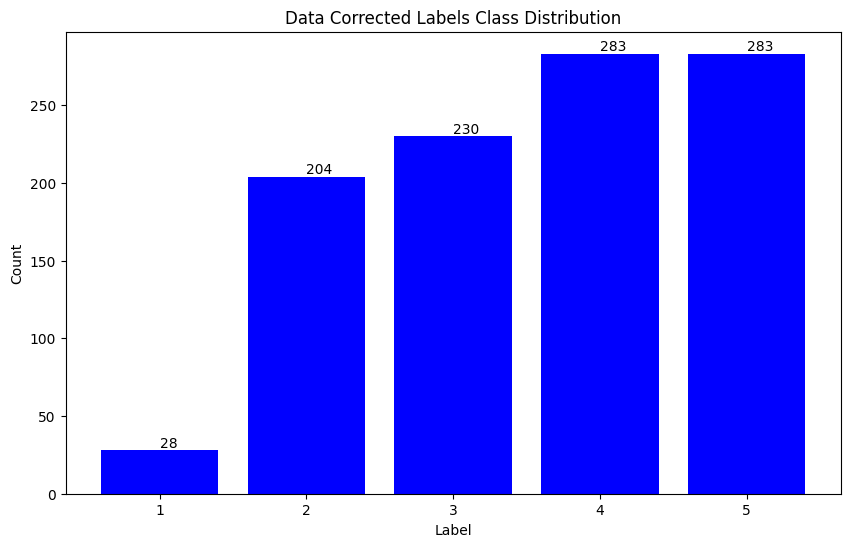

In [ ]:
import matplotlib.pyplot as plt

# data_corrected içerisindeki 'labels' sütununu al
labels = data_corrected["labels"]

# Her bir etiketin kaç kez geçtiğini say
label_counts = labels.value_counts()

# Bar grafiği oluştur
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color='blue')

# Eksen etiketleri ve başlığı ekle
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Data Corrected Labels Class Distribution")

# Her çubuğun üzerine sayıları yazdır
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()
